In [6]:
import pandas as pd
import re

# 파일 경로
file_path = 'data/ratings.txt'

# 데이터 불러오기
df = pd.read_table(file_path)

print("✅")

✅


In [7]:
print(f"전체 샘플 수: {len(df)}")
print(df['label'].value_counts())
print(df['label'].value_counts(normalize=True))  # 비율 확인

전체 샘플 수: 200000
1    100000
0    100000
Name: label, dtype: int64
1    0.5
0    0.5
Name: label, dtype: float64


---
### **완전하게 라벨 분포가 균형잡혀져 있는 이진 분류 셋이라는 것을 알 수 있음.**
학습할 때 클래스 불균형 문제는 발생하지 않을 것으로 예상된다.

---

### EDA 단계를 진행한다.

1. 문장 길이 분포 파악
2. 짧은 문장, 긴 문장이 어떻게 생겨먹었는지 파악
3. 중복, 결측치 확인 후
4. 그에 맞는 전처리 text_preprocessing()함수 진행
5. 이후 (1,2,3) 한번 더 확인 
6. 길이 제한 둬서 최종 데이터셋 만들기

---

count    200000.000000
mean         35.214555
std          29.539834
min           1.000000
25%          16.000000
50%          27.000000
75%          42.000000
max         142.000000
Name: length, dtype: float64
count    200000.000000
mean         35.214555
std          29.539834
min           1.000000
25%          16.000000
50%          27.000000
75%          42.000000
max         142.000000
Name: length, dtype: float64


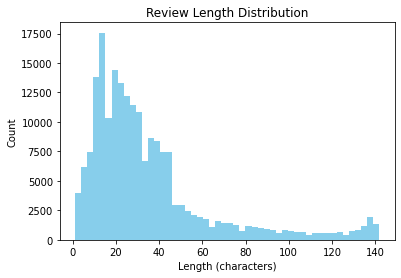

In [9]:
#모든 값을 다 문자열로 변환한다. 
df['document'] = df['document'].astype(str)
df['length'] = df['document'].apply(len)
print(df['length'].describe())

df['length'] = df['document'].apply(len)

# 길이 통계
print(df['length'].describe())

# 시각화
import matplotlib.pyplot as plt

plt.hist(df['length'], bins=50, color='skyblue')
plt.title('Review Length Distribution')
plt.xlabel('Length (characters)')
plt.ylabel('Count')
plt.show()

In [14]:
# 짧은 리뷰 한번 어떻게 되어 있나 보기
short_reviews = df[df['length'] == 2]
print(short_reviews.sample(10, random_state=42))

             id document  label  length
87093   6820719       강추      1       2
93253   6077183       ..      1       2
154434  5204559       시시      0       2
79675   3267793       쩔음      1       2
144451  5651563       최악      0       2
103795  7725616       그양      0       2
131995  2803886       코믹      0       2
99382   6800488       합격      1       2
8768    6719975       걸작      1       2
16861   6317400       최고      1       2


In [13]:
# 큰 리뷰 어떻게 되어 있나 보기
long_reviews = df[df['length'] >= 120]
print(long_reviews.sample(10, random_state=42))

              id                                           document  label  \
22936    8172805  아...!!! 너무도 짠~한사랑..!!그치만 다른것 재는것 없이 그저 일단 마음이 ...      1   
140236   9244838  연출을 밥말아드심! 초반부 뜬금없는 키스로 사건이 촉발되더니,난데없는 운석도 그렇고...      0   
169859   8171662  누구나 다 알만한 제목 오늘 우연히 보았는데...OO미화하고 쥐뿔도업는데 백마탄왕자...      0   
151915   8128749  후반기교육가서 봤는데 정말.. 할말이없다... 난 영화관에서 봐서 어쩔수없이 끝까지...      0   
16967    9699731  월요일만 기다렸고 두근두근 설레면서 아프고 마음 추스리고 ... 드라마랑 같은 감정...      1   
28914   10172101  원래 음울한 거 별로 좋지 않은데 이 영화는 음울한 분위기가 심하게 몽환적이지도 심...      1   
172413  10232436  류승범 네임드로 봤는데 감당이 안되는 똥이네요... 중2병 컨셉이면 웃기기라도 하던...      0   
113072   8062785  이 영화 보면서 진짜 짜증이 밀려오는데 스토리가 중요한 내용은 하나도 없고..여자아...      0   
118425  10067268  미스 리틀 선샤인이 10점 만점 10점인걸 기대하고 봤지만 시작부터 끝까지 병맛. ...      0   
12129    8784387  정말 추천하는 영화 끝이허무하지만 감동적입니다. 극중 주인공 글로리아(샤론스톤)가 ...      1   

        length  
22936      133  
140236     132  
169859     136  
151915     137  
16967      128  
28914      136  
172413     140  
11307

In [15]:
print("결측치 개수 (document 열 기준):", df['document'].isnull().sum())

결측치 개수 (document 열 기준): 0


In [16]:
print("중복된 리뷰 수:", df.duplicated(subset=['document']).sum())

중복된 리뷰 수: 5456


In [17]:
import re

# 전처리 함수
def text_preprocessing(text):
    # 1. NaN 방지: 문자열 변환
    if pd.isnull(text):
        return ""
    
    # 2. 특수문자 제거 (한글, 영어, 숫자, 공백만 남김)
    text = re.sub(r"[^가-힣a-zA-Z0-9\s]", "", text)
    
    # 3. 양쪽 공백 제거
    text = text.strip()
    
    return text


In [106]:
# 중복 제거
df.drop_duplicates(subset=['document'], inplace=True)

# 전처리 함수 적용
df['document'] = df['document'].astype(str).apply(text_preprocessing)


결측치 개수: 0
중복된 리뷰 수: 0
길이 통계:
count    190741.000000
mean         33.614477
std          28.184435
min           0.000000
25%          15.000000
50%          25.000000
75%          40.000000
max         140.000000
Name: length, dtype: float64


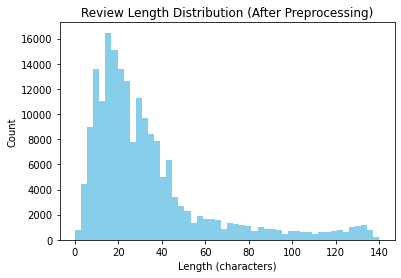

In [107]:
print("결측치 개수:", df['document'].isnull().sum())
print("중복된 리뷰 수:", df.duplicated(subset=['document']).sum())
print("길이 통계:")
df['length'] = df['document'].apply(len)
print(df['length'].describe())

# 히스토그램 다시 확인
import matplotlib.pyplot as plt
plt.hist(df['length'], bins=50, color='skyblue')
plt.title('Review Length Distribution (After Preprocessing)')
plt.xlabel('Length (characters)')
plt.ylabel('Count')
plt.show()


In [108]:
MIN_LEN = 2
MAX_LEN = 60

# 전처리된 df에서 길이 필터링
df_final = df[(df['length'] >= MIN_LEN) & (df['length'] <= MAX_LEN)].reset_index(drop=True)
print(f"최종 리뷰 수: {len(df_final)}")

최종 리뷰 수: 165678


In [109]:
# 클래스 불균형 일어났는지 확인해본다.

print("라벨 분포:")
print(df_final['label'].value_counts())

print("\n라벨 비율:")
print(df_final['label'].value_counts(normalize=True))


라벨 분포:
1    83204
0    82474
Name: label, dtype: int64

라벨 비율:
1    0.502203
0    0.497797
Name: label, dtype: float64


In [110]:
# 짧은 리뷰 한번 어떻게 되어 있나 보기
short_reviews = df[df['length'] == 2]
print(short_reviews.sample(10, random_state=42))

             id document  label  length
24034   4160674       공감      1       2
1031    2388425       섬뜩      1       2
48251   5762751       신코      1       2
15686   7071024       조아      1       2
167703  2592061       허무      0       2
47504   3766234       유후      1       2
136640  1870701       게이      0       2
64701    888944       황제      1       2
16239   4160324       피식      1       2
15422   3584920       탁월      1       2


In [111]:
# 큰 리뷰 어떻게 되어 있나 보기
long_reviews = df[df['length'] >= 120]
print(long_reviews.sample(10, random_state=42))

              id                                           document  label  \
66391    9469405  사랑 그리고 죽음 사랑하는 사람을 남겨두고 가야하는 그 심정을 덜하지도 더하지도 않...      1   
136184   7205380  현재 마돈나를 생각하면 옛날에 인기있었던 미녀섹시 가수라는 생각밖에안든다 21세기의...      0   
8583     6662534  톰크루즈며 조연 배우들도 하나같이 멋있다 전개는 좀 아쉽지만 30년 가까이 지난 지...      1   
79238   10120350  미국땅 극우 백인우월자들만의 이야기일까 온갖 차별주의자로 가득한 우리 대한민국의 풍...      1   
194548   7922436  별주기도 아까운듯 불보듯 뻔한 아닌 상황서도 꿋꿋이 하곤 작가일 그만두곤 눈물바다가...      0   
42344    9554297  소설과 별개로 보자면 이 영화는 우리나라 최고의 영화입니다좌우익의 대립과 우리나라의...      1   
31679    6665000  파격적이지 않고 뻔할 수 잇지만 진정한 의미의 감동을 전한다 파격을 준다는 것으로 ...      1   
6072     9757097  오스카는 흔히 볼수있는 아들이자 장난끼 많은 오빠 그리고 항상 미안해하는 남편 감정...      1   
61978    9722454  만약에 태양계 바깥의 어느 계에서 전파가 날라온다면 이라는 간단한 상상을 마치 현실...      1   
12189    9280733  뭐라해야할지 크리스찬베일이나온영화거의다봤는데 사실 부잣집으로 나온다고하길래 다크나이...      1   

        length  
66391      134  
136184     122  
8583       130  
79238      134  
194548     131  
42344      133  
31679      128  
6072 

---
### 데이터 전처리는 잘되어진 것 같다.
1. 특수문자 제거
2. 중복리뷰 제거
3. 문장길이 필터링
4. 최종데이터셋 확보

---

In [112]:
import sentencepiece as spm
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# -----------------------------
print("\n✅ [Step 1] 학습용 SentencePiece 텍스트 파일 생성")
with open("spm_input.txt", "w") as f:
    for row in df_final['document']:
        f.write(row + "\n")

# 0~5번 샘플 확인
print("\n🟢 문장 샘플 (0~5)")
print(df_final['document'].iloc[:5].to_list())


✅ [Step 1] 학습용 SentencePiece 텍스트 파일 생성

🟢 문장 샘플 (0~5)
['어릴때보고 지금다시봐도 재밌어요', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음 최고', '와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화', '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화']


In [113]:
print("\n✅ [Step 2] SentencePiece 모델 학습")
spm.SentencePieceTrainer.Train(
    input='spm_input.txt',
    model_prefix='spm',
    vocab_size=8250, #======================================> 계속 실험할 부분
    model_type='unigram',
    character_coverage=0.9995
)


✅ [Step 2] SentencePiece 모델 학습


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm
  model_type: UNIGRAM
  vocab_size: 8250
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_white

In [114]:
# -----------------------------
print("\n✅ [Step 3] 토크나이저 로딩 및 sp_tokenize 함수 정의")
sp = spm.SentencePieceProcessor()
sp.load("spm.model")

def sp_tokenize(text):
    if pd.isnull(text):
        return []
    return sp.encode_as_ids(str(text).strip())



✅ [Step 3] 토크나이저 로딩 및 sp_tokenize 함수 정의


NFO) Initialized 266292 seed sentencepieces
trainer_interface.cc(526) LOG(INFO) Tokenizing input sentences with whitespace: 165678
trainer_interface.cc(537) LOG(INFO) Done! 257272
unigram_model_trainer.cc(489) LOG(INFO) Using 257272 sentences for EM training
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=132435 obj=14.0197 num_tokens=543194 num_tokens/piece=4.10159
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=122101 obj=13.1168 num_tokens=545574 num_tokens/piece=4.46822
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=91528 obj=13.2056 num_tokens=573496 num_tokens/piece=6.2658
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=91363 obj=13.1513 num_tokens=573706 num_tokens/piece=6.27941
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=68516 obj=13.3811 num_tokens=608294 num_tokens/piece=8.87813
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=68506 obj=13.319 num_tokens=608434 num_tokens/piece=8.88147
unigram_model_trainer

In [115]:
print("\n✅ [Step 4] 전체 문장 토큰화 및 패딩")
X = [sp_tokenize(text) for text in df_final['document']]
X_padded = pad_sequences(X, maxlen=60, padding='post')
y = df_final['label'].astype('float32').values

# 0~5번 샘플 확인
print("\n🟢 토큰화된 샘플 (0~5)")
for i in range(5):
    print(f"{i}: {X[i]}")

print("\n🟢 패딩된 샘플 (0~5)")
print(X_padded[:5])



✅ [Step 4] 전체 문장 토큰화 및 패딩

🟢 토큰화된 샘플 (0~5)
0: [1204, 145, 237, 6605, 464]
1: [2902, 1832, 609, 4303, 40, 313, 3, 2554, 141, 3, 3965, 1296, 962, 604, 77]
2: [259, 433, 22, 110, 3563, 386, 2913, 59, 230, 5748, 4027, 288, 1739, 1742, 22, 4, 15]
3: [39, 153, 306, 2002, 17, 3957, 78, 2974, 12, 2186, 131, 665, 838, 438, 315, 4]
4: [1699, 337, 4311, 1548, 1420, 285, 5102, 74, 131, 24]

🟢 패딩된 샘플 (0~5)
[[1204  145  237 6605  464    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [2902 1832  609 4303   40  313    3 2554  141    3 3965 1296  962  604
    77    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
   

In [116]:
vocab = [sp.id_to_piece(i) for i in range(sp.get_piece_size())]

# 데이터프레임으로 보기
import pandas as pd
vocab_df = pd.DataFrame({
    'index': list(range(len(vocab))),
    'piece': vocab
})
print(vocab_df.head(10))  # 상위 10개

   index  piece
0      0  <unk>
1      1    <s>
2      2   </s>
3      3      ▁
4      4    ▁영화
5      5      이
6      6      가
7      7      의
8      8      도
9      9      는


In [117]:
print("\n✅ [Step 5] 학습/검증 데이터 분할 및 모델 학습")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# 모델 구성
model = Sequential([
    Embedding(input_dim=8000, output_dim=128, input_length=60),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# -----------------------------
# 콜백 정의
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath='best_sp_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=1)
]

# -----------------------------
# 학습 시작
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=callbacks
)

# -----------------------------
print("\n✅ [Step 6] 최종 검증 정확도")
loss, acc = model.evaluate(X_val, y_val)
print(f"✅ 최종 검증 정확도: {acc:.4f}")


✅ [Step 5] 학습/검증 데이터 분할 및 모델 학습
Epoch 1/10
2071/2071 [==============================] - 15s 6ms/step - loss: 0.6933 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4993

Epoch 00001: val_loss improved from inf to 0.69315, saving model to best_sp_model.h5
Epoch 2/10
2071/2071 [==============================] - 13s 6ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4998

Epoch 00002: val_loss did not improve from 0.69315

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 3/10
2071/2071 [==============================] - 13s 6ms/step - loss: 0.6766 - accuracy: 0.5380 - val_loss: 0.4995 - val_accuracy: 0.7612

Epoch 00003: val_loss improved from 0.69315 to 0.49947, saving model to best_sp_model.h5
Epoch 4/10
2071/2071 [==============================] - 13s 6ms/step - loss: 0.3939 - accuracy: 0.8274 - val_loss: 0.3687 - val_accuracy: 0.8362

Epoch 00004: val_loss improved from 0.49947 to 0.36866, saving model to best_

---
### 실험결과 정리

#### Vocab size 별 Val accuracy 정리

(Vocabsize, Early stop Epoch, Val_accuracy)

(4000, 6, 0.8487) (4000, 6, 0.8500)

(5000, 4, 0.4989)

(6000, 3, 0.5161)

(7000, 3, 0.4989)

(7500, 3, 0.6281)

(7750, 10, 0.8262) 

(8000, 7, 0.8535) 

(8250, 3,

(10000, 4, 0.4989)

(12000, 4, 0.4989)

---
하나하나 하기 귀찮으니깐 코드로 만들어버리자

In [105]:
import os
import sentencepiece as spm
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# 데이터 준비
# df_final['document'], df_final['label'] 가 준비되어 있어야 합니다.

results = []

for vocab_size in range(3000, 12001, 250):
    print(f"\n============================")
    print(f"✅ [Step 2] vocab_size = {vocab_size}")
    print(f"============================")
    
    # 1. SentencePiece 학습
    input_file = 'spm_input.txt'
    model_prefix = f'spm_{vocab_size}'
    spm.SentencePieceTrainer.Train(
        input=input_file,
        model_prefix=model_prefix,
        vocab_size=vocab_size,
        model_type='unigram',
        character_coverage=0.9995
    )
    
    # 2. 토크나이저 로딩 및 토큰화 함수 정의
    sp = spm.SentencePieceProcessor()
    sp.load(f"{model_prefix}.model")

    def sp_tokenize(text):
        if pd.isnull(text):
            return []
        return sp.encode_as_ids(str(text).strip())

    X = [sp_tokenize(text) for text in df_final['document']]
    X_padded = pad_sequences(X, maxlen=60, padding='post')
    y = df_final['label'].astype('float32').values

    # 3. 학습/검증 분할
    X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

    # 4. 모델 구성
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=60),
        LSTM(128),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 5. 콜백 정의
    early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=0)
    checkpoint = ModelCheckpoint(filepath='temp_model.h5', monitor='val_loss', save_best_only=True, verbose=0)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=0)

    # 6. 학습
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=64,
        callbacks=[early_stop, checkpoint, reduce_lr],
        verbose=0  # 로그 출력 줄이기
    )

    best_epoch = len(history.history['val_loss'])
    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    results.append({'vocab_size': vocab_size, 'best_epoch': best_epoch, 'val_accuracy': round(acc, 4)})

# 결과 정리
results_df = pd.DataFrame(results)
print("\n✅ 실험 결과 요약")
print(results_df)

# 상위 정확도 5개 정렬해서 보기
print("\n🔍 정확도 기준 상위 Top 5")
print(results_df.sort_values(by='val_accuracy', ascending=False).head())



✅ [Step 2] vocab_size = 3000


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_3000
  model_type: UNIGRAM
  vocab_size: 3000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 3250


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_3250
  model_type: UNIGRAM
  vocab_size: 3250
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 3500


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_3500
  model_type: UNIGRAM
  vocab_size: 3500
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 3750


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_3750
  model_type: UNIGRAM
  vocab_size: 3750
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 4000


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_4000
  model_type: UNIGRAM
  vocab_size: 4000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 4250


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_4250
  model_type: UNIGRAM
  vocab_size: 4250
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 4500


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_4500
  model_type: UNIGRAM
  vocab_size: 4500
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 4750


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_4750
  model_type: UNIGRAM
  vocab_size: 4750
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 5000


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_5000
  model_type: UNIGRAM
  vocab_size: 5000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 5250


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_5250
  model_type: UNIGRAM
  vocab_size: 5250
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 5500


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_5500
  model_type: UNIGRAM
  vocab_size: 5500
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 5750


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_5750
  model_type: UNIGRAM
  vocab_size: 5750
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 6000


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_6000
  model_type: UNIGRAM
  vocab_size: 6000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 6250


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_6250
  model_type: UNIGRAM
  vocab_size: 6250
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 6500


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_6500
  model_type: UNIGRAM
  vocab_size: 6500
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 6750


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_6750
  model_type: UNIGRAM
  vocab_size: 6750
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 7000


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_7000
  model_type: UNIGRAM
  vocab_size: 7000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 7250


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_7250
  model_type: UNIGRAM
  vocab_size: 7250
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 7500


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_7500
  model_type: UNIGRAM
  vocab_size: 7500
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 7750


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_7750
  model_type: UNIGRAM
  vocab_size: 7750
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 8000


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_8000
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 8250


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_8250
  model_type: UNIGRAM
  vocab_size: 8250
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 8500


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_8500
  model_type: UNIGRAM
  vocab_size: 8500
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 8750


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_8750
  model_type: UNIGRAM
  vocab_size: 8750
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 9000


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_9000
  model_type: UNIGRAM
  vocab_size: 9000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 9250


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_9250
  model_type: UNIGRAM
  vocab_size: 9250
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 9500


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_9500
  model_type: UNIGRAM
  vocab_size: 9500
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 9750


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_9750
  model_type: UNIGRAM
  vocab_size: 9750
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] vocab_size = 10000


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_10000
  model_type: UNIGRAM
  vocab_size: 10000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escap


✅ [Step 2] vocab_size = 10250


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_10250
  model_type: UNIGRAM
  vocab_size: 10250
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escap


✅ [Step 2] vocab_size = 10500


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_10500
  model_type: UNIGRAM
  vocab_size: 10500
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escap


✅ [Step 2] vocab_size = 10750


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_10750
  model_type: UNIGRAM
  vocab_size: 10750
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escap


✅ [Step 2] vocab_size = 11000


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_11000
  model_type: UNIGRAM
  vocab_size: 11000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escap


✅ [Step 2] vocab_size = 11250


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_11250
  model_type: UNIGRAM
  vocab_size: 11250
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escap


✅ [Step 2] vocab_size = 11500


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_11500
  model_type: UNIGRAM
  vocab_size: 11500
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escap


✅ [Step 2] vocab_size = 11750


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_11750
  model_type: UNIGRAM
  vocab_size: 11750
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escap


✅ [Step 2] vocab_size = 12000


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_12000
  model_type: UNIGRAM
  vocab_size: 12000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escap


✅ 실험 결과 요약
    vocab_size  best_epoch  val_accuracy
0         3000           4        0.5013
1         3250           8        0.8387
2         3500           7        0.4989
3         3750           8        0.8448
4         4000          10        0.8456
5         4250           7        0.8439
6         4500           5        0.6064
7         4750           3        0.4989
8         5000           6        0.4989
9         5250           7        0.6543
10        5500           6        0.8510
11        5750           4        0.4989
12        6000           3        0.4989
13        6250           4        0.6231
14        6500           9        0.6750
15        6750          10        0.4989
16        7000          10        0.8492
17        7250           4        0.4989
18        7500           3        0.4989
19        7750           9        0.6796
20        8000           7        0.8525
21        8250           3        0.4989
22        8500           4        0.4989
23  

#### 실험 결과 그래프

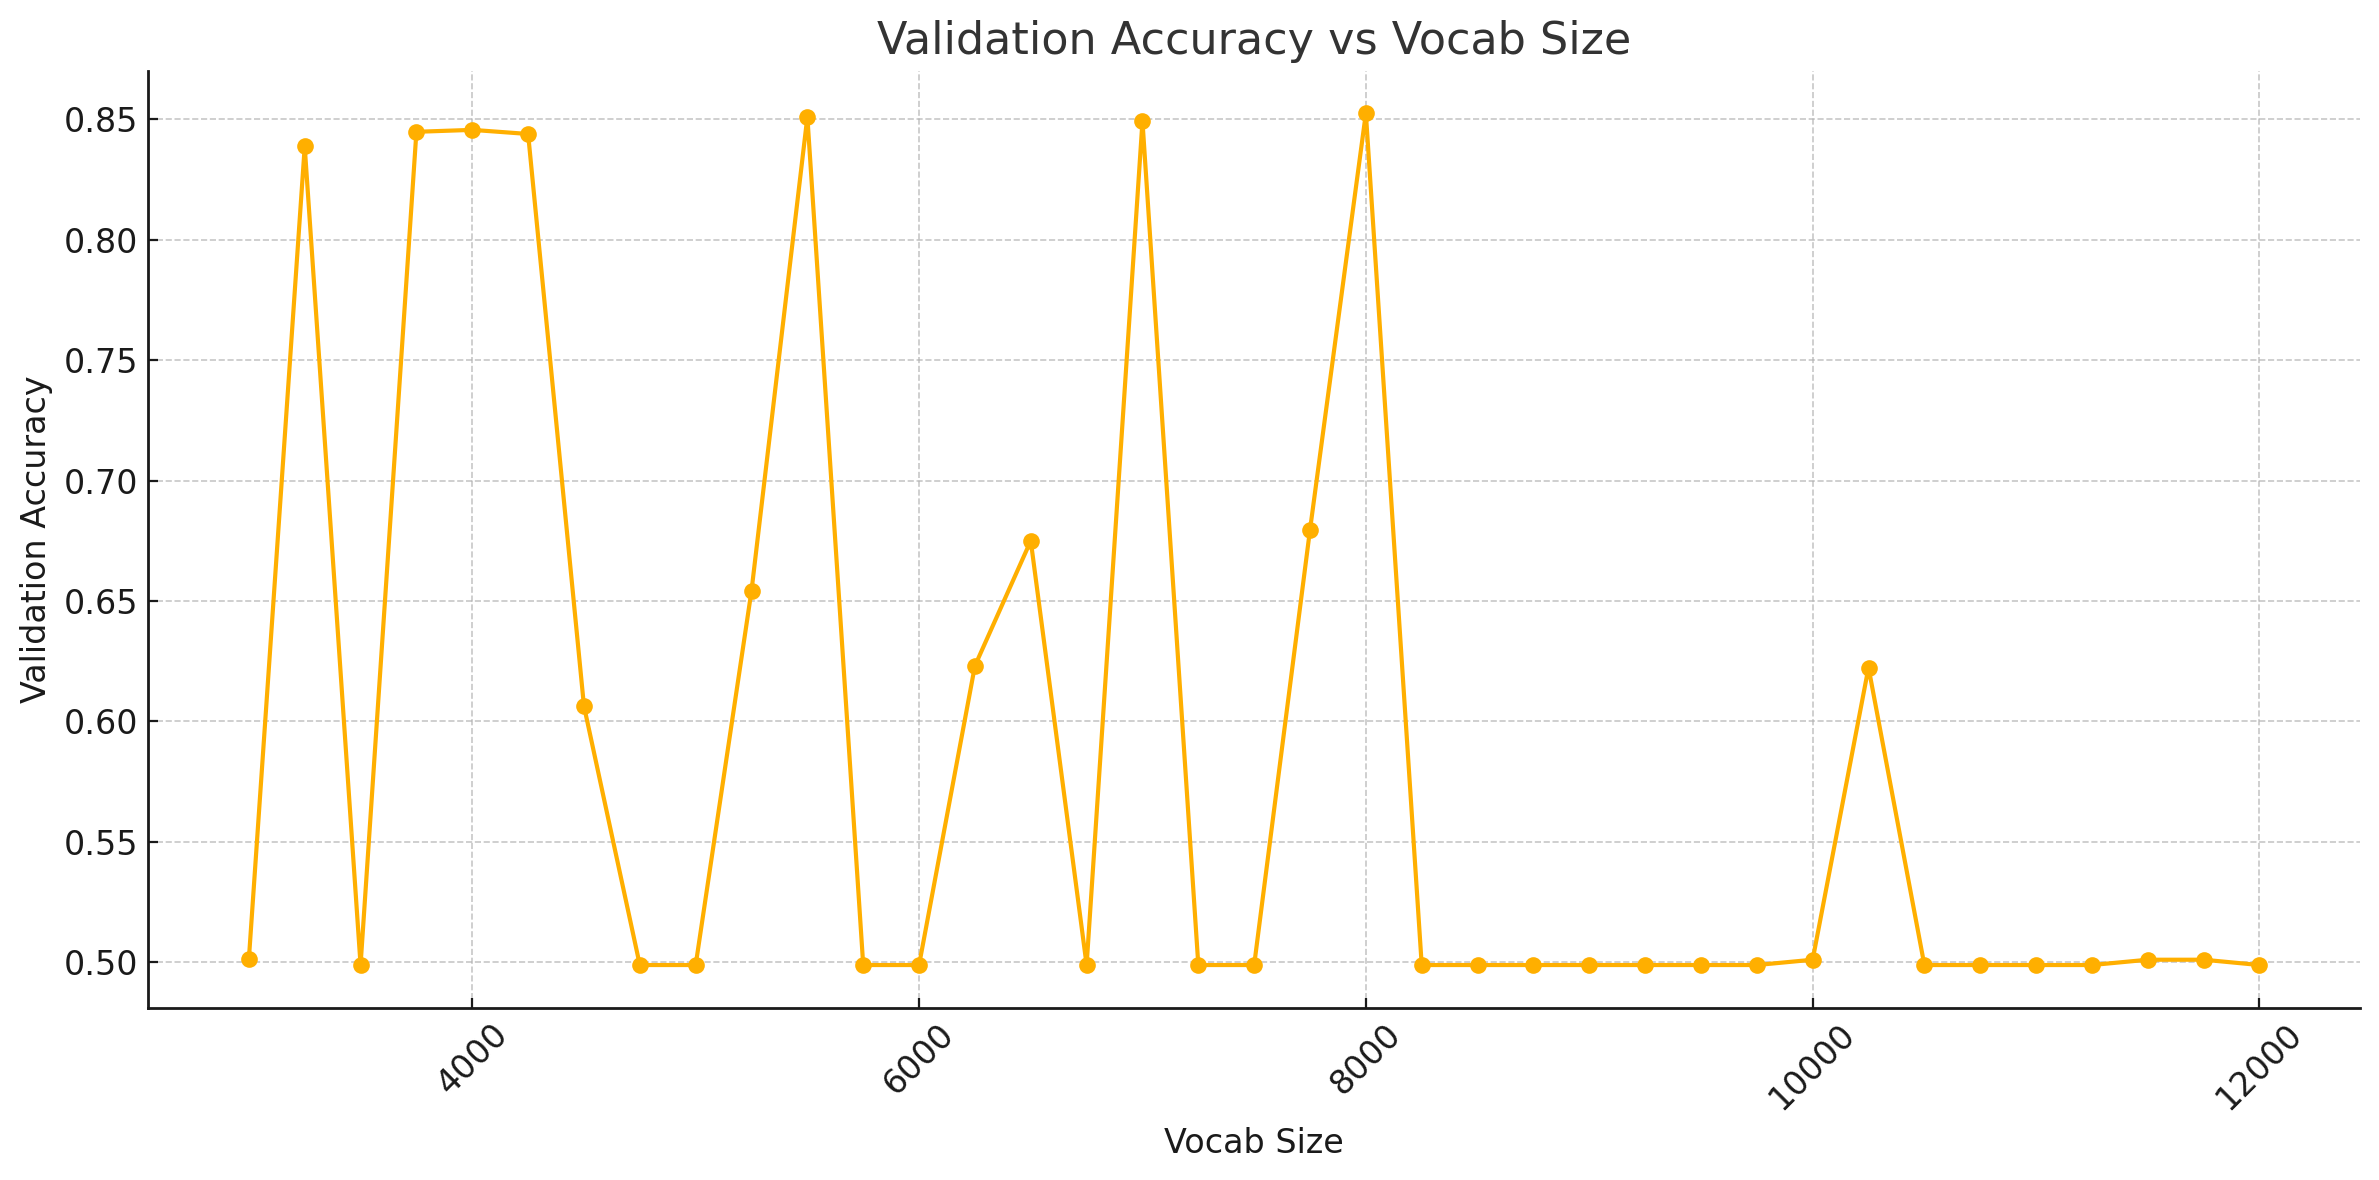

🔍 정확도 기준 상위 Top 5

    vocab_size  best_epoch  val_accuracy
    
     8000           7        0.8525

     5500           6        0.8510

     7000          10        0.8492

     4000          10        0.8456

     3750           8        0.8448


최고 성능: vocab_size = 8000일 때, 검증 정확도(val_accuracy)가 0.8525로 가장 높음.

상위 5개 vocab_size는 8000, 5500, 7000, 4000, 3750이며, 모두 0.84 이상의 정확도를 보임.

저성능 구간: vocab_size가 너무 작거나(3000) 너무 클 때(9000 이상), 정확도가 0.5 이하로 급감하는 구간이 있음.

결론: vocab_size 5500 ~ 8000 구간이 성능 최적의 범위로 보임.

---


In [120]:
import os
import sentencepiece as spm
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# ✅ 데이터 준비
# df_final['document'], df_final['label'] 가 미리 준비되어 있어야 함
# 예: df_final = pd.read_csv('naver_movie_train.csv')

results = []
vocab_size = 8000
model_types = ['unigram', 'bpe', 'char', 'word']

for model_type in model_types:
    print(f"\n============================")
    print(f"✅ [Step 2] model_type = {model_type}")
    print(f"============================")

    # 1. SentencePiece 학습
    input_file = 'spm_input.txt'
    model_prefix = f'spm_{model_type}_{vocab_size}'
    spm.SentencePieceTrainer.Train(
        input=input_file,
        model_prefix=model_prefix,
        vocab_size=vocab_size,
        model_type=model_type,
        character_coverage=0.9995
    )

    # 2. 토크나이저 로딩 및 토큰화
    sp = spm.SentencePieceProcessor()
    sp.load(f"{model_prefix}.model")

    def sp_tokenize(text):
        if pd.isnull(text):
            return []
        return sp.encode_as_ids(str(text).strip())

    X = [sp_tokenize(text) for text in df_final['document']]
    X_padded = pad_sequences(X, maxlen=60, padding='post')
    y = df_final['label'].astype('float32').values

    # 3. 학습/검증 분할
    X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

    # 4. 모델 구성
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=60),
        LSTM(128),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 5. 콜백 정의
    early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=0)
    checkpoint = ModelCheckpoint(filepath=f'best_{model_type}_model.h5', monitor='val_loss', save_best_only=True, verbose=0)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=0)

    # 6. 학습
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=64,
        callbacks=[early_stop, checkpoint, reduce_lr],
        verbose=0
    )

    best_epoch = len(history.history['val_loss'])
    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    results.append({'model_type': model_type, 'best_epoch': best_epoch, 'val_accuracy': round(acc, 4)})

# ✅ 결과 정리
results_df = pd.DataFrame(results)
print("\n✅ 실험 결과 요약")
print(results_df)

# ✅ 상위 정확도 5개 정렬
print("\n🔍 정확도 기준 상위 Top")
print(results_df.sort_values(by='val_accuracy', ascending=False))



✅ [Step 2] model_type = unigram


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_unigram_8000
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
 


✅ [Step 2] model_type = bpe


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_bpe_8000
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_


✅ [Step 2] model_type = char


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_char_8000
  model_type: CHAR
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escap


✅ [Step 2] model_type = word


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: spm_input.txt
  input_format: 
  model_prefix: spm_word_8000
  model_type: WORD
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escap


✅ 실험 결과 요약
  model_type  best_epoch  val_accuracy
0    unigram           9        0.8409
1        bpe           6        0.8459
2       char           9        0.8473
3       word           6        0.5002

🔍 정확도 기준 상위 Top
  model_type  best_epoch  val_accuracy
2       char           9        0.8473
1        bpe           6        0.8459
0    unigram           9        0.8409
3       word           6        0.5002


✅ **실험 결과 요약**

| model_type | best_epoch | val_accuracy |
|------------|------------|---------------|
| unigram    | 9          | 0.8409        |
| bpe        | 6          | 0.8459        |
| char       | 9          | 0.8473        |
| word       | 6          | 0.5002        |

🔍 **정확도 기준 상위 Top**

| model_type | best_epoch | val_accuracy |
|------------|------------|---------------|
| char       | 9          | 0.8473        |
| bpe        | 6          | 0.8459        |
| unigram    | 9          | 0.8409        |
| word       | 6          | 0.5002        |

# 회고

---

1. Char / BPE / Unigram은 성능이 우수하며, Word 기반은 학습에 부적합함.

2. Vocab Size는 5500 ~ 8000 사이가 가장 적절. 너무 vocab size가 높을 수록 오히려 의미가 불명확해지는 것 같다.

3. 이 실험을 통해 Subword 기반 모델과 Vocab Size 조정이 실제 성능에 매우 중요한 영향을 미친다는 점을 확인함.

4. 전처리는 단계별로 하는게 가장 좋다.

5. 근데 왜 저런 결과들이 나왔을까는 아직 의문?
